<a href="https://colab.research.google.com/github/SantiagoPinedaM/Integracion-de-Datos-y-Prospectiva-/blob/main/Caracterizacion_de_la_distribucion_agregada_de_perdida_Integracion_de_datos_y_prospectiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Caso estudio**
Se quiere caracterizar (Media, Desviacion, Asimetria, Kurtosis) la distribucion agregada de perdidas como resultado de las perdidas asociadas a los creditos que posee una FINTECH. Las Variables que definen la Loss Distribucion Aproach (LDA) se obtiene del producto de las siguientes variables:
- Monto (EAD): Es el monto de dinero que una persona solicita a la FINTECH.
- Probabilidad Default: Es la probabilidad de que una persona incumpla el credito a lo largo de su (PD) vigencia.
- LGD (Loss Guarntee Default): La garantia que el solicitante puede colocar sobre el credito (Carro, casa, beca, finca).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #Para grafico de distribucion

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
nxl = '/content/drive/MyDrive/6. SolicitantesCrédito(USD)1.xlsx'
XDB=pd.read_excel(nxl,sheet_name=1)
display(XDB)


,Unnamed: 0,Edad,Genero,Estado civil,Hijos,Perscargo,Nivel Renta,Estrato,Nivel de estudios,Tipo de contrato,...,Plazo,Cuota (COP),ConoCliente,Garantia,RespPat,MoraCome,PreApr,Prob.Default (PD),Score,LGD
0,1,38,NR,Casado,1,0,0,3,Bachiller,Ninguno,...,48,18.375890,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1,0.041659,582.478943,0.063702
1,2,51,NR,Separado,6,1,1,4,Técnico,Ninguno,...,36,5.062492,Buenas Referencias,Sin Codeudor,Prop.sin Hipoteca,Con Experiencia sin Mora,1,0.234951,479.839966,0.465636
2,3,37,Mujer,Casado,2,0,0,3,Tecnólogo,Indefinido,...,36,10.287688,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,0,0.170330,417.653107,0.290071
3,4,29,NR,Separado,1,0,0,2,Tecnólogo,Ninguno,...,24,15.458878,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,1,0.201659,316.791107,0.278389
4,5,42,Mujer,Casado,3,4,4,2,Especializacion,Ninguno,...,24,24.995180,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,1,0.140929,441.809570,0.203359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5837,8372,48,Hombre,Separado,0,0,0,3,Tecnólogo,Fijo,...,36,27.043503,Buenas Referencias,Sin Codeudor,Prop.sin Hipoteca,Con Experiencia sin Mora,1,0.056132,550.980408,0.091441
5838,8374,31,Hombre,Soltero,2,0,0,5,Bachiller,Indefinido,...,48,25.579568,Buena Experiencia CFB,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1,0.035120,659.471375,0.066962
5839,8375,38,Hombre,Separado,0,0,0,3,Bachiller,Labor Contratada,...,36,21.508792,Buenas Referencias,Sin Codeudor,Prop.sin Hipoteca,Con Experiencia sin Mora,1,0.101976,465.011536,0.165936
5840,8376,43,Mujer,Casado,1,2,2,2,Tecnólogo,Ninguno,...,36,11.047468,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1,0.156707,423.237305,0.247763


In [ ]:
LDA=XDB.iloc[:,25]*XDB.iloc[:,33]*(1+XDB.iloc[:,35])

display(LDA)

,0
0,27.720684
1,48.220333
2,62.529578
3,79.826756
4,84.906838
...,...
5837,45.828755
5838,32.629819
5839,70.737589
5840,59.751330


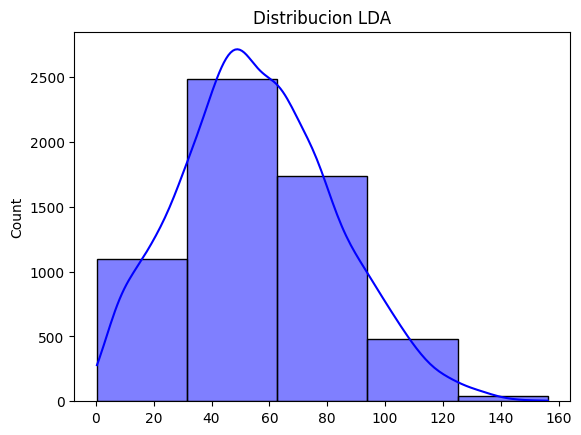

In [ ]:
NC=5 #Grafico De distribucion
plt.figure()
sns.histplot(LDA,kde=True,bins=NC,color='blue')
plt.title('Distribucion LDA')
plt.show()

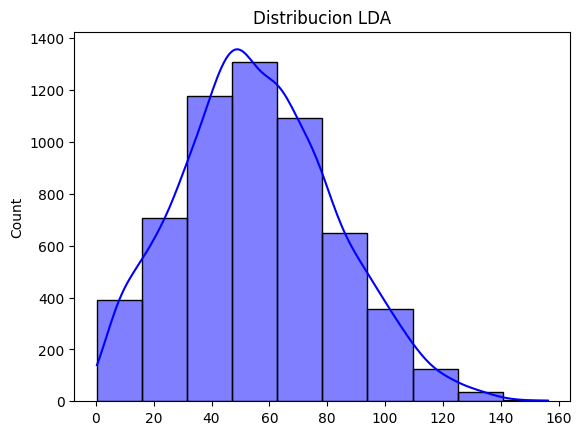

,LI,LS,Counts,Perdida
0,0.388425,15.974978,392.0,8.181701
1,15.974978,31.561531,706.0,23.768254
2,31.561531,47.148084,1175.0,39.354807
3,47.148084,62.734637,1307.0,54.941360
4,62.734637,78.321190,1091.0,70.527913
5,78.321190,93.907743,647.0,86.114466
6,93.907743,109.494295,355.0,101.701019
7,109.494295,125.080848,126.0,117.287572
8,125.080848,140.667401,37.0,132.874125
9,140.667401,156.253954,6.0,148.460678


In [ ]:
NC=10 #Grafico De distribucion
plt.figure()
sns.histplot(LDA,kde=True,bins=NC,color='blue')
plt.title('Distribucion LDA')
plt.show()

#Obetenemos la informacion de la Distribucion
counts, bin_edges=np.histogram(LDA,bins=NC)
LI=bin_edges[:-1];LS=bin_edges[1:]
mc=(LI+LS)/2 #El valor representativo de cada intervalo

#Se crea la table de caracterizacion
TASQ= np.column_stack((LI,LS,counts,mc))
df_TASQ=pd.DataFrame(TASQ,columns=['LI','LS','Counts','Perdida'])
display(df_TASQ)


3. Se obtiene las medidas de dispercion y tendecia central (Media, Varianza, Desviacion)

In [ ]:
u=np.sum(mc*counts)/np.sum(counts)
print("La media de los datos es: ", u) #Valor esperado

varianza=np.sum(counts*(mc-u)**2)/np.sum(counts)
print("La varianza de los datos es: ",varianza)

desviacion=np.sqrt(varianza)
print("La desviacion de los datos es: ",desviacion)


La media de los datos es:  56.04058301402913
La varianza de los datos es:  728.9443323653097
La desviacion de los datos es:  26.998969098195392


In [ ]:
#Quiero identificar datos raros o outliers
LIe= u-2*desviacion;LSe=u+2*desviacion
outliers = LDA[(LDA < LIe) | (LDA > LSe)]
print("Los valores atípicos son: ",outliers)

Los valores atípicos son:  32      115.252397
52      111.186541
138     111.469313
155     122.486203
190     132.526585
           ...    
5691    133.411243
5728    119.437771
5743    131.697063
5793    129.248175
5800    119.950700
Length: 183, dtype: float64


In [ ]:
import scipy.stats as stats
from scipy.stats import skew

In [ ]:
#Coeficiente de asimetria
cas= np.sum(counts*(mc-u)**3)/np.sum(counts*desviacion**3)
print("El coeficiente de asimetria es: ",cas)
vcas=(skew(LDA)-cas)/skew(LDA)
print("El valor de asimetria es: ",vcas*100)

El coeficiente de asimetria es:  0.28716410440756895
El valor de asimetria es:  0.3961019396804293


In [ ]:
#Coeficiente de Curtosis
curt = np.sum(counts*(mc-u)**4)/np.sum(counts*desviacion**4)-3
print("El coeficiente de curtosis es: ",curt)

El coeficiente de curtosis es:  -0.2508175670986499
